# 회귀분석(Regression)
- 데이터를 이용하여 함수식(Y=aX+b)를 구한다.
- 기울기(DL:weight) 와 절편(DL:Bias)을 DataSet으로 최적값을 구한다.
              (정답과 오차율의 차이가 제일 적은 것으로 선택 --> 인공신경망으로 발전)
- 기울기와 절편으로 Y값을 예측할 수 있다.

### 단순회귀 분석 : Y = aX+b

In [1]:
regression <- read.csv("../Data//regression.csv")

head(regression)

age,Height,Weight
0~3Months,59.1,5.9
3~6Months,66.7,8.0
6~9Months,71.4,8.9
9~12Months,75.0,10.1
12~18Months,80.1,10.9
2Year,87.8,13.2


In [2]:
tail(regression)

,age,Height,Weight
26,30~34Year,171.3,71.5
27,35~39Year,170.7,72.3
28,40~49Year,168.6,70.6
29,50~59Year,166.1,69.1
30,60~69Year,164.4,65.9
31,70YearOver,162.4,61.1


In [3]:
str(regression)

'data.frame':	31 obs. of  3 variables:
 $ age   : Factor w/ 31 levels "0~3Months","10Year",..: 1 16 24 30 4 15 19 21 23 26 ...
 $ Height: num  59.1 66.7 71.4 75 80.1 ...
 $ Weight: num  5.9 8 8.9 10.1 10.9 13.2 14.8 16.7 19.1 21.5 ...


In [4]:
# 기본통계량 확인

summary(regression)

          age         Height          Weight     
 0~3Months  : 1   Min.   : 59.1   Min.   : 5.90  
 10Year     : 1   1st Qu.:105.7   1st Qu.:17.90  
 11Year     : 1   Median :150.7   Median :45.20  
 12~18Months: 1   Mean   :135.8   Mean   :42.62  
 12Year     : 1   3rd Qu.:169.8   3rd Qu.:66.65  
 13Year     : 1   Max.   :173.8   Max.   :72.30  
 (Other)    :25                                  

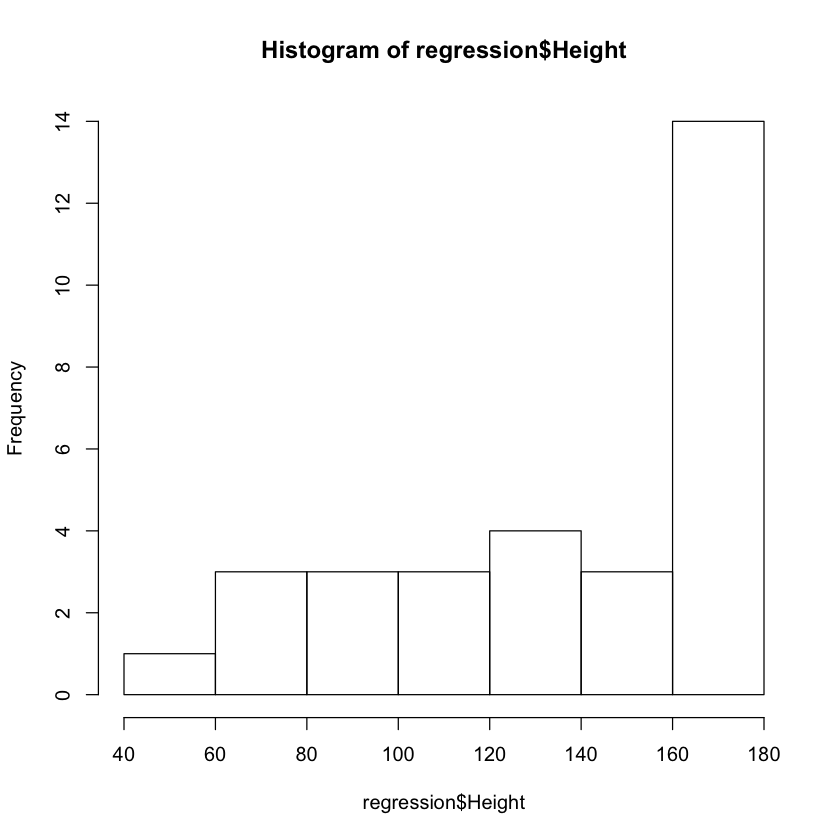

In [5]:
hist(regression$Height)

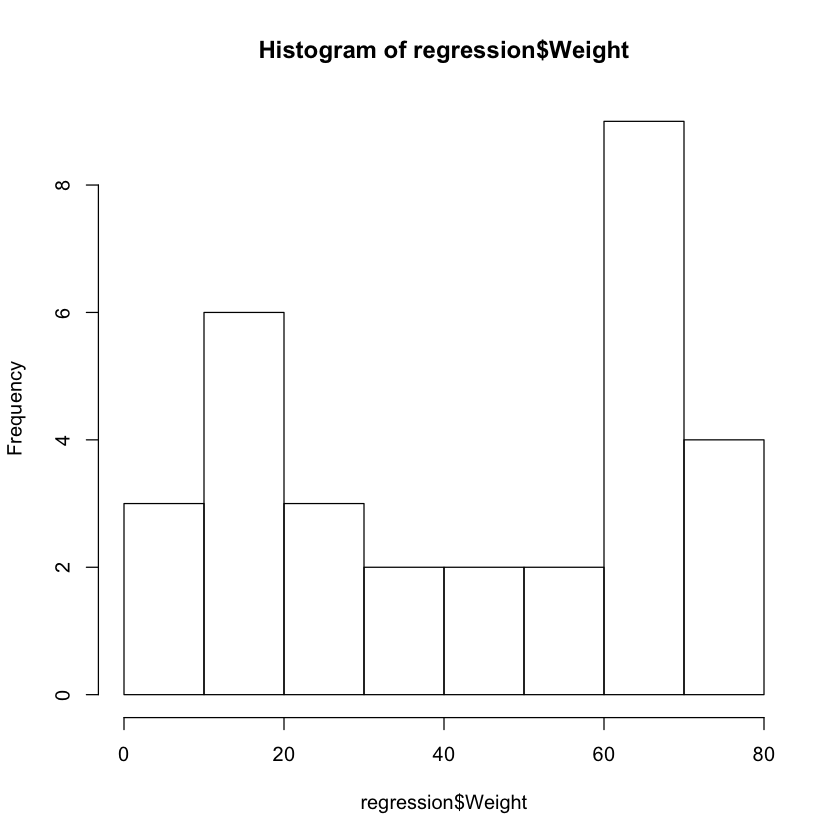

In [6]:
hist(regression$Weight)

In [7]:
cor(regression$Height, regression$Weight)

[1] 0.9672103

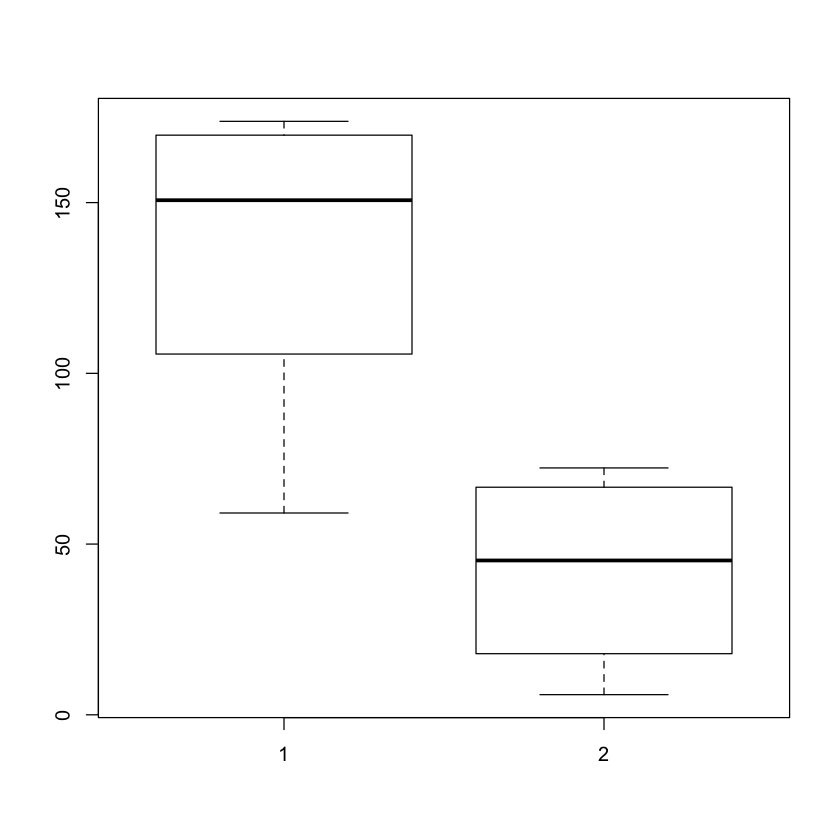

In [8]:
boxplot(regression$Height, regression$Weight)

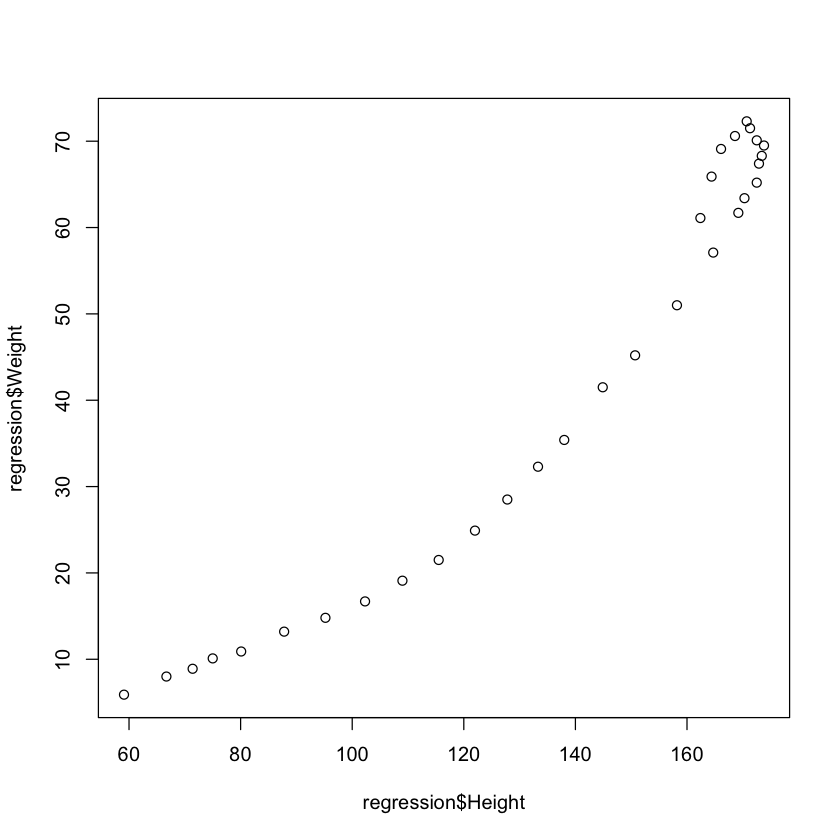

In [9]:
plot(regression$Height, regression$Weight)

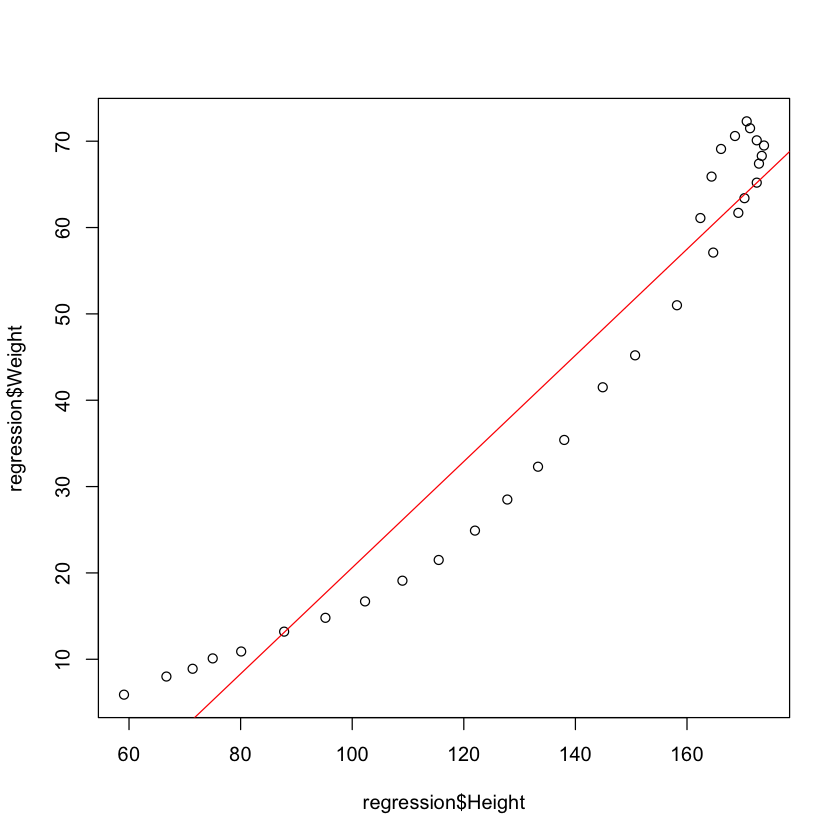

In [10]:
plot(regression$Weight ~ regression$Height)

# 회귀선 (중심선, 평균선)
r <- lm(regression$Weight ~ regression$Height)
abline(r, col="red") # 최적의 공식을 가지고 선을 만들어줌

In [11]:
# 분석결과
options(scipen = 100)
summary(r)


Call:
lm(formula = regression$Weight ~ regression$Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2327 -5.9811  0.0915  5.3125 10.4346 

Coefficients:
                   Estimate Std. Error t value             Pr(>|t|)    
(Intercept)       -40.86594    4.22768  -9.666       0.000000000142 ***
regression$Height   0.61474    0.02998  20.508 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.355 on 29 degrees of freedom
Multiple R-squared:  0.9355,	Adjusted R-squared:  0.9333 
F-statistic: 420.6 on 1 and 29 DF,  p-value: < 0.00000000000000022


p-value: < 2.2e-16 < 0.05 <br>
Adjusted R-squared:  0.9333 <- 예측력 <br>
Residual standard error: 6.355 <- RSE 표준오차*** <br>

In [12]:
# Coefficients*
# *** : 절대표시 중요함

In [13]:
# 회귀식

r


Call:
lm(formula = regression$Weight ~ regression$Height)

Coefficients:
      (Intercept)  regression$Height  
         -40.8659             0.6147  


In [14]:
# 키가 170인 사람의 몸무게
hei <- 0.6147 * 170 + (-40.8659)

# 표준 오차를 적용한 키가 170인 사람의 몸무게 
cat(hei-6.355, "~", hei+6.355)


57.2781 ~ 69.9881

---
# IQ

In [17]:
iq02 <- read.csv("../Data/IQ.csv")

iq02

이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
A,90,140,2,1,0
B,75,125,1,3,3
C,77,120,1,0,4
D,83,135,2,3,2
E,65,105,0,4,4
F,80,123,3,1,1
G,83,132,3,4,1
H,70,115,1,1,3
I,87,128,4,0,0
J,79,131,2,2,3


In [18]:
# iq가 126인 사람의 성적을 예측해 보시오

str(iq02)

'data.frame':	10 obs. of  6 variables:
 $ 이름         : Factor w/ 10 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10
 $ 성적         : int  90 75 77 83 65 80 83 70 87 79
 $ IQ           : int  140 125 120 135 105 123 132 115 128 131
 $ 다니는.학원수: int  2 1 1 2 0 3 3 1 4 2
 $ 게임하는.시간: int  1 3 0 3 4 1 4 1 0 2
 $ TV시청.시간  : int  0 3 4 2 4 1 1 3 0 3


In [19]:
summary(iq02)

      이름        성적            IQ        다니는.학원수  게임하는.시간
 A      :1   Min.   :65.0   Min.   :105.0   Min.   :0.00   Min.   :0.0  
 B      :1   1st Qu.:75.5   1st Qu.:120.8   1st Qu.:1.00   1st Qu.:1.0  
 C      :1   Median :79.5   Median :126.5   Median :2.00   Median :1.5  
 D      :1   Mean   :78.9   Mean   :125.4   Mean   :1.90   Mean   :1.9  
 E      :1   3rd Qu.:83.0   3rd Qu.:131.8   3rd Qu.:2.75   3rd Qu.:3.0  
 F      :1   Max.   :90.0   Max.   :140.0   Max.   :4.00   Max.   :4.0  
 (Other):4                                                              
  TV시청.시간 
 Min.   :0.0  
 1st Qu.:1.0  
 Median :2.5  
 Mean   :2.1  
 3rd Qu.:3.0  
 Max.   :4.0  
              

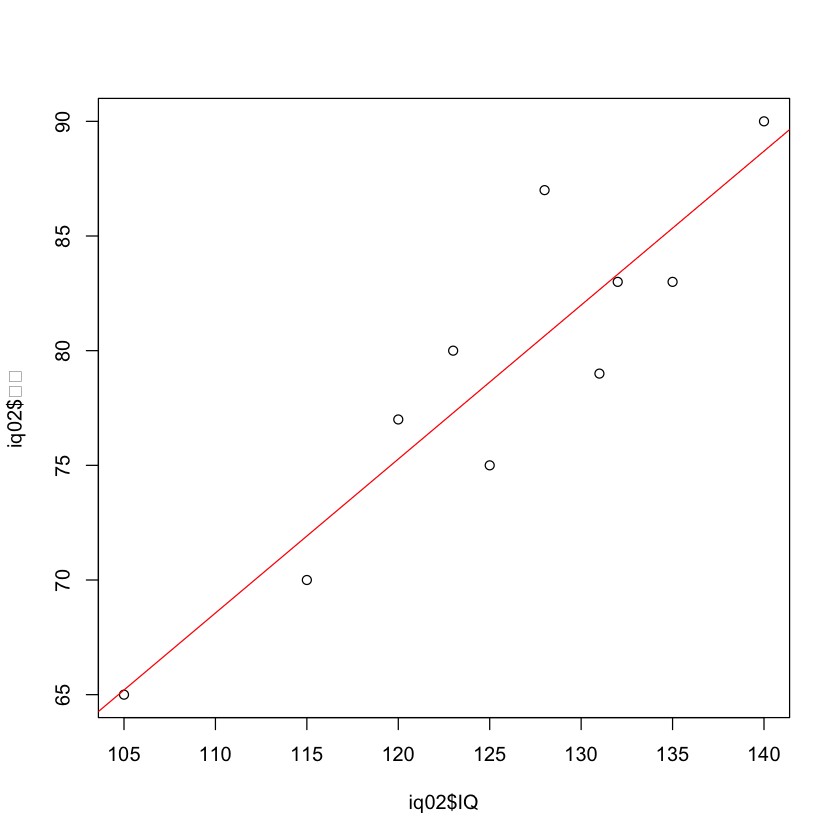

In [21]:
options(warn = -1)
plot(iq02$IQ, iq02$성적)

iq <- lm(iq02$성적 ~  iq02$IQ)
abline(iq, col='red')


In [22]:
cor(iq02$성적, iq02$IQ)

[1] 0.9102242

In [23]:
summary(iq)


Call:
lm(formula = iq02$성적 ~ iq02$IQ)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6598 -2.2384 -0.2674  1.6186  6.3544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.2918    13.5832  -0.390 0.707007    
iq02$IQ       0.6714     0.1080   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.322 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [24]:
iq


Call:
lm(formula = iq02$성적 ~ iq02$IQ)

Coefficients:
(Intercept)      iq02$IQ  
    -5.2918       0.6714  


In [ ]:
# Intercept가 ***을 가지지 않기 때문에 b값을 가지지 않는다.
#

iq126 <- 0.6714*126

cat(iq126-3.322, "~", iq126+3.322)

In [25]:
# 성적과 관련이 깊은 항목은 ? (상관계수)
# iq..
cor(iq02$성적, iq02$IQ)
cor(iq02$성적, iq02$다니는.학원수)
cor(iq02$성적, iq02$게임하는.시간)
cor(iq02$성적, iq02$TV시청.시간)

[1] 0.9102242

[1] 0.7840514

[1] -0.3383549

[1] -0.8473333

In [ ]:
# 학원을 몇군데 다녀야 성적이 90점 이상이 될까?

par(family = "AppleGothic")
cor(iq02$다니는.학원수, iq02$성적)

plot(iq02$다니는.학원수 ~ iq02$성적)

score <- lm(iq02$다니는.학원수 ~ iq02$성적)
abline(score, col='red')

In [ ]:
summary(score)

In [ ]:
score

In [ ]:
y <- 90*(0.1241)+(-7.8916)
y

In [ ]:
cat(y-0.7882, "~", y+0.7882)

In [ ]:
# 성적이 85점이라면 IQ는 얼마?
par(family = "AppleGothic")

plot(iq02$IQ ~ iq02$성적)
iq85 <- lm(iq02$IQ ~ iq02$성적)
abline(iq85, col='red')

In [ ]:
summary(iq85)

In [ ]:
iq85

In [ ]:
resultIq <- 1.234*85 + 28.035

In [ ]:
cat(resultIq-4.504, "~", resultIq+4.504)

---
# 다중 회귀 분석
- 여러개의 항목들로 구성된 식으로 에측하는 방법


### attitude
- 대형 금융기관의 사무직 대상으로 진급의 요소에 대한 설문조사 30개부서(무작위) 약 35명을 대상으로 한 설문지 데이터
- 각 수치는 부서의 7개 질문에 대한 점수를 나타낸다.

In [ ]:
help(attitude)

In [ ]:
head(attitude)

In [ ]:
tail(attitude)

In [ ]:
str(attitude)

In [ ]:
plot(attitude)

In [ ]:
# 회귀분석 # . : 앞의 데이터를 제외한 전부*** 
model <- lm(rating ~ . , data = attitude)
model

rating = 0.61319 * complaints + (-0.07305) * privileges + ... + 10.78708

In [ ]:
# Model 검토
summary(model)

> Adjusted R-squared:  0.6628

In [ ]:
cor(attitude)

In [ ]:
# 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거

reduced <- step(model, direction = "backward")

In [ ]:
summary(reduced)

> Adjusted R-squared:  0.6864 

In [ ]:
# 관련없는 데이터 삭제 후 예측력 수치가 0.66에서 0.68로 상승함

reduced

---
# iris에 대한 다중 회귀분석

In [ ]:
Species <- lm(as.numeric(Species) ~ . , data = iris)
Species

str(iris)

In [ ]:
summary(iris)
summary(Species)

In [ ]:
cor(iris)

In [ ]:
reduced <- step(Species, direction = "backward")

In [ ]:
summary(reduced)